# Linear Regression


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df.head()

<ipython-input-1-69f679858591>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

Get dataset size (Number of rows and number of columns)

In [2]:
df.shape

(46578, 16)

Display summary statistics for numeric columns and number of unique values in each column

In [3]:
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578,46578.000000,46578,46578,46578,46578,46578,46578,46578
unique,NaN,48,648,1097,71,2,46578,34,NaN,39460,20,17,4686,1021,953,2286
top,NaN,Ford,Altima,Base,Sedan,automatic,5npeb4acxdh702805,fl,NaN,1.0mi,black,black,"ford motor credit company,llc",$11300,$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,7871,1610,4851,17171,44928,1,7451,NaN,86,9156,20734,1733,168,397,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Get Number of missing (null) values

In [4]:
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [6]:
# Check unique values in each column
for col in df.columns:
    print(f'Unique values in {col}: {df[col].unique()}')


Unique values in year: [2013 2014 2012 2002 2007 2008 2011 2015 2010 2005 2006 2009 2004 1998
 2001 2003 1996 1997 2000 1999 1995 1991 1990 1994 1993 1992]
Unique values in make: ['Hyundai' 'Toyota' 'Lexus' 'BMW' 'Ford' 'Kia' 'Chevrolet' 'Cadillac'
 'Mercedes-Benz' 'Jeep' 'Infiniti' 'Lincoln' 'Mazda' 'Chrysler' 'GMC'
 'Honda' 'Dodge' 'Audi' 'Nissan' 'Buick' 'MINI' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Volkswagen' 'Subaru' 'Porsche' 'Isuzu' 'Saturn' 'Pontiac'
 'Scion' 'Acura' 'Ram' 'Land Rover' 'Suzuki' 'Mercury' 'HUMMER' 'Saab'
 'Maserati' 'FIAT' 'Geo' 'smart' 'Oldsmobile' 'Fisker' 'Bentley'
 'Plymouth' 'Ferrari' 'Aston Martin']
Unique values in model: ['Sonata' '4Runner' 'IS 250' 'X5' 'E-Series Van' 'Optima' 'Avalanche'
 'CTS' 'E-Class' 'Forte' 'Wrangler' 'G Sedan' 'MKS' 'Soul' 'Ranger'
 'Mazda6' 'Tundra' 'PT Cruiser' 'Acadia' 'Mustang' 'Odyssey' 'X3' 'STS'
 'F-150' 'Sienna' 'Liberty' 'DTS' 'Sebring' 'Nitro' 'Tacoma' 'Elantra'
 'Q7' 'Maxima' 'Corvette' 'Grand Cherokee' 'FJ Cruiser' 'Fiesta'

In [7]:
# Example: Check if selling prices are greater than or equal to MMR
wrong_prices = df[df['sellingprice'] < df['mmr']]
print(wrong_prices)


       year           make         model   trim          body transmission  \
0      2013        Hyundai        Sonata    GLS         sedan    automatic   
3      2002            BMW            X5   4.4i           SUV    automatic   
4      2014           Ford  E-Series Van  E-250  E-Series Van    automatic   
6      2007      Chevrolet     Avalanche     LS      Crew Cab    automatic   
8      2011  Mercedes-Benz       E-Class   E350         Sedan    automatic   
...     ...            ...           ...    ...           ...          ...   
46564  2012         Toyota       Prius v  Three         Wagon    automatic   
46568  2006      Chevrolet        Impala     LT         Sedan    automatic   
46569  2005       Cadillac      Escalade   Base           SUV    automatic   
46575  2013            BMW      3 Series   328i         Sedan    automatic   
46577  2013            Kia           Rio     LX         Sedan    automatic   

                     vin state  condition    odometer      colo

Checking unique values to avoid wrong entries as null values were 0, so to observe typo or wrong entries which will be considered as null values

In [8]:
# Assuming 'column_name' is the name of the column you want to analyze
unique_counts = df['make'].value_counts()

# Display all unique values and their counts
for value, count in unique_counts.items():
    print(f'{value}: {count}')


Ford: 7871
Chevrolet: 5322
Nissan: 4297
Toyota: 3474
Dodge: 2718
Honda: 2403
Hyundai: 1801
BMW: 1680
Kia: 1639
Chrysler: 1566
Infiniti: 1442
Mercedes-Benz: 1375
Jeep: 1305
Volkswagen: 1038
Lexus: 1024
GMC: 901
Mazda: 701
Cadillac: 606
Audi: 485
Acura: 476
Buick: 467
Lincoln: 457
Subaru: 444
Ram: 397
Pontiac: 377
Mitsubishi: 370
MINI: 289
Saturn: 286
Volvo: 281
Scion: 159
Mercury: 148
Land Rover: 143
Porsche: 129
Jaguar: 122
Suzuki: 96
HUMMER: 84
FIAT: 56
Saab: 41
smart: 36
Oldsmobile: 24
Isuzu: 19
Maserati: 10
Bentley: 8
Fisker: 3
Plymouth: 3
Geo: 2
Aston Martin: 2
Ferrari: 1


In [9]:
# Assuming 'column_name' is the name of the column you want to analyze
unique_counts = df['year'].value_counts()

# Display all unique values and their counts
for value, count in unique_counts.items():
    print(f'{value}: {count}')

2013: 8682
2012: 8448
2014: 6887
2011: 4072
2008: 2646
2007: 2466
2010: 2254
2006: 2168
2009: 1826
2005: 1641
2004: 1323
2003: 1058
2015: 816
2002: 761
2001: 553
2000: 350
1999: 230
1998: 158
1997: 92
1996: 61
1995: 44
1994: 16
1993: 8
1992: 8
1991: 6
1990: 4


In [10]:
# Assuming 'column_name' is the name of the column you want to analyze
unique_counts = df['model'].value_counts()

# Display all unique values and their counts
for value, count in unique_counts.items():
    print(f'{value}: {count}')


Altima: 1610
F-150: 1179
Fusion: 1115
Camry: 1081
Escape: 1063
Focus: 921
Accord: 823
Impala: 721
G Sedan: 717
Corolla: 685
3 Series: 682
Grand Caravan: 675
Civic: 672
Malibu: 598
Explorer: 592
Cruze: 557
Sonata: 556
Silverado 1500: 556
Elantra: 546
Maxima: 519
Town and Country: 502
Edge: 479
Taurus: 432
C-Class: 432
Mustang: 428
Sentra: 422
Avenger: 411
Rogue: 409
Equinox: 404
Charger: 400
200: 396
Optima: 393
Jetta: 384
Grand Cherokee: 375
5 Series: 334
Wrangler: 333
E-Class: 331
300: 327
Odyssey: 304
Sorento: 291
Journey: 291
CR-V: 282
RAV4: 282
Passat: 271
1500: 271
Sienna: 266
Tahoe: 262
Soul: 255
Forte: 254
Mazda3: 239
Fiesta: 233
Murano: 232
Versa: 231
F-250 Super Duty: 219
Liberty: 215
Sierra 1500: 212
Cooper: 211
Suburban: 210
RX 350: 204
Expedition: 202
X5: 186
IS 250: 186
ES 350: 183
TL: 178
Durango: 175
Ram Pickup 1500: 174
Pathfinder: 171
G Coupe: 170
Traverse: 168
Sonic: 168
Pilot: 168
A4: 167
Cobalt: 165
Camaro: 163
Acadia: 163
CTS: 160
Highlander: 156
G6: 152
Patriot: 1

In [11]:
# Assuming 'column_name' is the name of the column you want to analyze
unique_counts = df['trim'].value_counts()

# Display all unique values and their counts
for value, count in unique_counts.items():
    print(f'{value}: {count}')

Base: 4851
SE: 3940
LX: 1912
Limited: 1506
LT: 1501
XLT: 1378
LS: 1151
LE: 1136
S: 1018
SXT: 1004
GLS: 998
Touring: 977
2.5 S: 939
SEL: 903
EX: 802
Sport: 795
2.5: 556
SLT: 514
EX-L: 486
LTZ: 457
SV: 419
G37x: 395
V6: 386
XL: 339
328i: 309
G37 Journey: 304
SL: 304
Lariat: 291
Titanium: 286
1LT: 275
3.5 SV: 269
LT Fleet: 257
Laredo: 246
LS Fleet: 225
2LT: 187
SE PZEV: 187
R/T: 185
SLE: 184
Premium: 176
Work Truck: 172
GT: 170
Denali: 159
Luxury: 158
3.5 S: 156
+: 154
ES: 150
XLE: 135
i Sport: 135
LT1: 129
SR5: 125
C250 Sport: 124
FX4: 123
1.6 SV: 121
2.5i Premium PZEV: 118
XLS: 114
CXL: 111
ST: 111
E-250: 109
L: 103
2500: 99
3.2: 97
i Touring: 96
1500 LS: 94
C: 94
SLT-1: 92
EX-L V-6: 89
G37: 89
528i: 89
GS: 88
1.8 S: 88
Unlimited Sahara: 87
E350: 85
SS: 85
335i: 82
Tradesman: 81
XE: 81
535i: 81
3.5 SL: 80
2.0T Premium quattro: 80
LE 7-Passenger Mobility Auto Access: 77
328i xDrive: 74
HSE: 73
Platinum: 72
Laramie: 71
3.5 SE: 71
2.0T: 70
1500: 70
Eddie Bauer: 68
2.0 SR: 68
S550: 66
E-350

In [12]:
# Assuming 'column_name' is the name of the column you want to analyze
unique_counts = df['body'].value_counts()

# Display all unique values and their counts
for value, count in unique_counts.items():
    print(f'{value}: {count}')

Sedan: 17171
SUV: 9942
sedan: 3686
suv: 1994
Hatchback: 1869
Minivan: 1817
Coupe: 1317
Wagon: 1215
Crew Cab: 1126
Convertible: 765
SuperCrew: 610
G Sedan: 566
hatchback: 401
minivan: 372
SuperCab: 369
Regular Cab: 333
Extended Cab: 319
crew cab: 283
Van: 280
Quad Cab: 268
coupe: 246
wagon: 219
convertible: 154
g sedan: 151
G Coupe: 138
supercrew: 130
Double Cab: 106
extended cab: 78
E-Series Van: 78
regular cab: 66
supercab: 64
van: 52
quad cab: 50
CrewMax Cab: 44
King Cab: 33
g coupe: 32
double cab: 31
G Convertible: 22
e-series van: 22
Genesis Coupe: 17
Club Cab: 17
Access Cab: 15
Koup: 12
Promaster Cargo Van: 9
g convertible: 8
CTS Coupe: 8
crewmax cab: 8
Beetle Convertible: 8
king cab: 7
Elantra Coupe: 6
genesis coupe: 5
mega cab: 5
Xtracab: 4
access cab: 4
Mega Cab: 3
Q60 Convertible: 2
G37 Convertible: 2
cts coupe: 2
Q60 Coupe: 2
CTS-V Coupe: 2
TSX Sport Wagon: 2
Cab Plus 4: 2
beetle convertible: 1
regular-cab: 1
GranTurismo Convertible: 1
tsx sport wagon: 1
CTS Wagon: 1
granturi

We found out that several items were written once in upper cases and once in lower cases so we need to standardize these strings

In [13]:
# Assuming 'df' is your DataFrame and 'body' is the column containing the words

# Convert 'body' column to lowercase
df['body'] = df['body'].str.lower()

# Display the updated unique values and their counts
unique_counts = df['body'].value_counts()
for value, count in unique_counts.items():
    print(f'{value.capitalize()}: {count}')


Sedan: 20857
Suv: 11936
Hatchback: 2270
Minivan: 2189
Coupe: 1563
Wagon: 1434
Crew cab: 1409
Convertible: 919
Supercrew: 740
G sedan: 717
Supercab: 433
Regular cab: 399
Extended cab: 397
Van: 332
Quad cab: 318
G coupe: 170
Double cab: 137
E-series van: 100
Crewmax cab: 52
King cab: 40
G convertible: 30
Genesis coupe: 22
Access cab: 19
Club cab: 17
Koup: 12
Cts coupe: 10
Promaster cargo van: 10
Beetle convertible: 9
Mega cab: 8
Elantra coupe: 6
Xtracab: 5
Tsx sport wagon: 3
Cab plus 4: 2
Q60 convertible: 2
G37 convertible: 2
Granturismo convertible: 2
Cts-v coupe: 2
Q60 coupe: 2
Regular-cab: 1
Cts wagon: 1
Transit van: 1


In [14]:
# Assuming 'column_name' is the name of the column you want to analyze
unique_counts = df['transmission'].value_counts()

# Display all unique values and their counts
for value, count in unique_counts.items():
    print(f'{value}: {count}')

automatic: 44928
manual: 1650


The next column which is 'vin' will be skipped since all its values will be unique (ID)

State Column

In [15]:
# Assuming 'column_name' is the name of the column you want to analyze
unique_counts = df['state'].value_counts()

# Display all unique values and their counts
for value, count in unique_counts.items():
    print(f'{value}: {count}')

fl: 7451
ca: 6440
tx: 4056
ga: 3008
nj: 2302
pa: 2287
il: 2082
oh: 1984
tn: 1891
nc: 1771
mo: 1500
mi: 1394
nv: 1154
va: 989
md: 981
wi: 979
mn: 870
az: 782
co: 712
wa: 686
ma: 600
ny: 498
ne: 392
sc: 389
in: 380
pr: 242
ms: 169
ut: 158
la: 157
hi: 139
or: 110
nm: 15
ok: 9
al: 1


In [16]:
# Assuming 'column_name' is the name of the column you want to analyze
unique_counts = df['condition'].value_counts()

# Display all unique values and their counts
for value, count in unique_counts.items():
    print(f'{value}: {count}')

1.9: 3651
3.5: 2239
3.7: 2227
4.3: 2135
4.2: 2130
4.4: 2112
3.6: 2058
4.1: 1971
2.9: 1715
4.0: 1702
3.9: 1698
2.0: 1678
3.8: 1668
2.8: 1638
3.4: 1443
2.7: 1372
4.8: 1111
4.9: 1092
4.6: 1073
4.5: 1066
2.5: 1065
2.6: 1000
4.7: 935
3.0: 898
3.3: 877
5.0: 875
3.2: 849
2.4: 824
2.1: 808
3.1: 757
2.3: 677
1.0: 577
2.2: 536
1.8: 32
1.7: 22
1.4: 18
1.6: 17
1.5: 12
1.3: 11
1.2: 5
1.1: 4


Odometer has a lot of unique values which is hard to dsplay them all

In [17]:
# Assuming 'column_name' is the name of the column you want to analyze
unique_counts = df['odometer'].value_counts()

# Display all unique values and their counts
for value, count in unique_counts.items():
    print(f'{value}: {count}')

Streaming output truncated to the last 5000 lines.
39468.0mi: 1
74774.0mi: 1
58224.0mi: 1
119227.0mi: 1
116000.0mi: 1
8562.0mi: 1
30871.0mi: 1
1200.0mi: 1
101288.0mi: 1
57533.0mi: 1
29058.0mi: 1
81590.0mi: 1
31919.0mi: 1
53949.0mi: 1
81976.0mi: 1
100316.0mi: 1
259699.0mi: 1
34206.0mi: 1
19285.0mi: 1
45862.0mi: 1
30840.0mi: 1
184619.0mi: 1
46649.0mi: 1
76998.0mi: 1
43090.0mi: 1
58765.0mi: 1
29779.0mi: 1
81058.0mi: 1
58085.0mi: 1
21519.0mi: 1
50222.0mi: 1
52149.0mi: 1
22179.0mi: 1
100034.0mi: 1
34582.0mi: 1
118317.0mi: 1
48767.0mi: 1
111946.0mi: 1
61214.0mi: 1
123991.0mi: 1
113453.0mi: 1
152798.0mi: 1
51495.0mi: 1
35021.0mi: 1
115742.0mi: 1
6649.0mi: 1
27602.0mi: 1
56577.0mi: 1
33798.0mi: 1
8587.0mi: 1
189650.0mi: 1
31385.0mi: 1
44883.0mi: 1
74897.0mi: 1
94471.0mi: 1
21531.0mi: 1
157564.0mi: 1
127320.0mi: 1
59321.0mi: 1
193571.0mi: 1
35711.0mi: 1
2791.0mi: 1
43111.0mi: 1
55365.0mi: 1
110225.0mi: 1
10563.0mi: 1
161545.0mi: 1
99048.0mi: 1
23218.0mi: 1
38103.0mi: 1
94805.0mi: 1
65682.0mi: 1

In [18]:
# Assuming 'column_name' is the name of the column you want to analyze
unique_counts = df['color'].value_counts()

# Display all unique values and their counts
for value, count in unique_counts.items():
    print(f'{value}: {count}')

black: 9156
white: 8693
gray: 7046
silver: 6982
blue: 4244
red: 3685
—: 2246
gold: 948
green: 891
burgundy: 785
beige: 744
brown: 529
orange: 195
purple: 137
off-white: 129
yellow: 99
charcoal: 49
turquoise: 15
pink: 3
lime: 2


In [19]:
# Assuming 'column_name' is the name of the column you want to analyze
unique_counts = df['interior'].value_counts()

# Display all unique values and their counts
for value, count in unique_counts.items():
    print(f'{value}: {count}')


black: 20734
gray: 15020
beige: 4917
tan: 3777
—: 988
brown: 694
blue: 101
red: 92
silver: 88
off-white: 39
purple: 31
gold: 26
white: 23
burgundy: 20
green: 16
orange: 11
yellow: 1


Remove special character and replace it wirh NaN

In [20]:
import numpy as np

# Replace '—' with NaN in the 'color' column
df['color'] = df['color'].replace('—', np.nan)

# Display the updated unique values and their counts
unique_counts = df['color'].value_counts(dropna=False)
for value, count in unique_counts.items():
    print(f'{value}: {count}')


black: 9156
white: 8693
gray: 7046
silver: 6982
blue: 4244
red: 3685
nan: 2246
gold: 948
green: 891
burgundy: 785
beige: 744
brown: 529
orange: 195
purple: 137
off-white: 129
yellow: 99
charcoal: 49
turquoise: 15
pink: 3
lime: 2


In [21]:
import numpy as np

# Replace '—' with NaN in the 'color' column
df['interior'] = df['interior'].replace('—', np.nan)

# Display the updated unique values and their counts
unique_counts = df['interior'].value_counts(dropna=False)
for value, count in unique_counts.items():
    print(f'{value}: {count}')


black: 20734
gray: 15020
beige: 4917
tan: 3777
nan: 988
brown: 694
blue: 101
red: 92
silver: 88
off-white: 39
purple: 31
gold: 26
white: 23
burgundy: 20
green: 16
orange: 11
yellow: 1


In [22]:
# Assuming 'column_name' is the name of the column you want to analyze
unique_counts = df['seller'].value_counts()

# Display all unique values and their counts
for value, count in unique_counts.items():
    print(f'{value}: {count}')

ford motor credit company,llc: 1733
the hertz corporation: 1561
nissan-infiniti lt: 1514
santander consumer: 1425
avis corporation: 1158
nissan infiniti lt: 959
wells fargo dealer services: 811
enterprise veh exchange/rental: 580
tdaf remarketing: 576
ge fleet services for itself/servicer: 548
ahfc/honda lease trust/hvt, inc. eot: 544
chrysler capital: 527
hyundai motor finance: 521
jpmorgan chase bank,n.a.: 515
financial services remarketing (lease): 511
gm financial: 495
mercedes-benz financial services: 442
avis budget group: 439
kia motors america, inc: 401
dt credit corporation: 401
capital one auto finance: 397
credit acceptance corp/vrs/southfield: 392
lease plan usa: 389
toyota financial services: 384
lexus financial services: 380
ford motor credit company,llc pd: 375
gm remarketing: 355
world omni financial corporation: 352
dtg operations inc: 344
wheels exchange llc: 312
nissan motor acceptance corporation: 280
ars/avis budget group: 279
ford motor credit company: 275
ford-li

In [23]:
# Assuming 'df' is your DataFrame
df['Model_trim'] = df['model'] + (' ') + df['trim']
print(df)


       year      make         model         trim          body transmission  \
0      2013   Hyundai        Sonata          GLS         sedan    automatic   
1      2014    Toyota       4Runner          SR5           suv    automatic   
2      2012     Lexus        IS 250         Base         sedan    automatic   
3      2002       BMW            X5         4.4i           suv    automatic   
4      2014      Ford  E-Series Van        E-250  e-series van    automatic   
...     ...       ...           ...          ...           ...          ...   
46573  2013      Ford          Edge           SE           suv    automatic   
46574  2012  Infiniti       G Sedan  G37 Journey       g sedan    automatic   
46575  2013       BMW      3 Series         328i         sedan    automatic   
46576  2013    Toyota         Camry           LE         sedan    automatic   
46577  2013       Kia           Rio           LX         sedan    automatic   

                     vin state  condition    odomet

In [24]:
import numpy as np
# Display the updated unique values and their counts
unique_counts = df['Model_trim'].value_counts(dropna=False)
for value, count in unique_counts.items():
    print(f'{value}: {count}')

Altima 2.5 S: 939
Focus SE: 737
Fusion SE: 731
F-150 XLT: 548
Altima 2.5: 525
Camry LE: 516
Grand Caravan SXT: 405
Corolla LE: 399
Camry SE: 384
Elantra GLS: 377
Town and Country Touring: 372
Sonata GLS: 357
Civic LX: 345
G Sedan G37x: 326
Explorer XLT: 316
3 Series 328i: 309
G Sedan G37 Journey: 304
Escape SE: 295
Escape XLT: 290
Avenger SE: 274
Mustang V6: 273
Optima LX: 271
Maxima 3.5 SV: 269
Grand Cherokee Laredo: 245
Rogue S: 231
Silverado 1500 LT: 230
Accord LX: 228
Sorento LX: 225
Cruze 1LT: 223
Edge SEL: 217
Malibu LT: 214
RX 350 Base: 203
Journey SXT: 200
Fiesta SE: 196
F-150 XL: 189
IS 250 Base: 186
Equinox LT: 186
ES 350 Base: 183
200 Touring: 177
Fusion SEL: 176
Impala LT Fleet: 176
Impala LT: 174
Civic EX: 166
RAV4 Base: 165
Liberty Sport: 164
Odyssey EX-L: 161
Cruze 2LT: 159
Taurus SEL: 158
F-150 Lariat: 157
Rogue SV: 154
Soul +: 154
Corolla S: 153
Explorer Limited: 153
Forte LX: 148
Edge Limited: 143
Charger SE: 142
Escape SEL: 139
Equinox LS: 139
Cooper Base: 136
Maxima

In [25]:
# Assuming 'df' is your DataFrame and 'column_to_drop' is the column you want to drop
df.drop(columns=['Model_trim'], inplace=True)


Check for duplicates

In [26]:
print(df.duplicated().sum())

0


Rrmove $ from mmr and selling price column in order to change object type to int to save memory

In [27]:
# Remove the dollar sign from the 'mmr' column
df['mmr'] = df['mmr'].str.replace('$', '')
# Remove the dollar sign from the 'sellingprice' column
df['sellingprice'] = df['sellingprice'].str.replace('$', '')

df.head()


<ipython-input-27-cc5a78ac0645>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['mmr'] = df['mmr'].str.replace('$', '')
<ipython-input-27-cc5a78ac0645>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['sellingprice'] = df['sellingprice'].str.replace('$', '')


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,NaN,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,e-series van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [28]:
# Remove the dollar sign from the 'sellingprice' column
df['odometer'] = df['odometer'].str.replace('mi', '')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,NaN,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,e-series van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [29]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer         object
color            object
interior         object
seller           object
mmr              object
sellingprice     object
saledate         object
dtype: object

Change sellingprice, mmr, and odometer data types to integer

In [30]:
df['mmr']=df['mmr'].astype('int64')
df['sellingprice']=df['sellingprice'].astype('int64')
df['odometer']=df['odometer'].astype('float64')

df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

In [31]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,NaN,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,e-series van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


Since odometer has all values .0 change float to int

In [32]:
df['odometer']=df['odometer'].astype('int64')

df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer          int64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

In [33]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,NaN,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,e-series van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [34]:
print(df['saledate'].unique())



['Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)'
 'Wed Feb 18 2015 07:15:00 GMT-0800 (PST)'
 'Tue Jan 20 2015 01:30:00 GMT-0800 (PST)' ...
 'Wed Mar 04 2015 01:45:00 GMT-0800 (PST)'
 'Wed Jun 17 2015 02:45:00 GMT-0700 (PDT)'
 'Tue Apr 28 2015 04:30:00 GMT-0700 (PDT)']


In [35]:
# Convert 'saledate' to datetime with errors='coerce'
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)

# Display the updated DataFrame
print(df)



       year      make         model         trim          body transmission  \
0      2013   Hyundai        Sonata          GLS         sedan    automatic   
1      2014    Toyota       4Runner          SR5           suv    automatic   
2      2012     Lexus        IS 250         Base         sedan    automatic   
3      2002       BMW            X5         4.4i           suv    automatic   
4      2014      Ford  E-Series Van        E-250  e-series van    automatic   
...     ...       ...           ...          ...           ...          ...   
46573  2013      Ford          Edge           SE           suv    automatic   
46574  2012  Infiniti       G Sedan  G37 Journey       g sedan    automatic   
46575  2013       BMW      3 Series         328i         sedan    automatic   
46576  2013    Toyota         Camry           LE         sedan    automatic   
46577  2013       Kia           Rio           LX         sedan    automatic   

                     vin state  condition  odometer

In [36]:
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)
print(df.dtypes)


year                          int64
make                         object
model                        object
trim                         object
body                         object
transmission                 object
vin                          object
state                        object
condition                   float64
odometer                      int64
color                        object
interior                     object
seller                       object
mmr                           int64
sellingprice                  int64
saledate        datetime64[ns, UTC]
dtype: object


In [37]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00
1,2014,Toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,NaN,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00
2,2012,Lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00
3,2002,BMW,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-03 23:10:00+00:00
4,2014,Ford,E-Series Van,E-250,e-series van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00


In [38]:
# Assuming 'df' is your DataFrame and 'body' is the column containing the original categories

# Create a mapping dictionary
body_mapping = {
    'sedan': 'Sedan',
    'suv': 'SUV',
    'hatchback': 'Hatchback',
    'minivan': 'Minivan',
    'coupe': 'Coupe',
    'wagon': 'Wagon',
    'crew cab': 'Pickup Truck',
    'convertible': 'Convertible',
    'supercrew': 'Pickup Truck',
    'g sedan': 'Sedan',
    'supercab': 'Pickup Truck',
    'regular cab': 'Pickup Truck',
    'extended cab': 'Pickup Truck',
    'van': 'Minivan',  # Assuming vans are categorized as Minivan
    'quad cab': 'Pickup Truck',
    'g coupe': 'Coupe',
    'double cab': 'Pickup Truck',
    'e-series van': 'Minivan',  # Assuming e-series vans are categorized as Minivan
    'crewmax cab': 'Pickup Truck',
    'king cab': 'Pickup Truck',
    'g convertible': 'Convertible',
    'genesis coupe': 'Coupe',
    'access cab': 'Pickup Truck',
    'club cab': 'Pickup Truck',
    'koup': 'Coupe',
    'cts coupe': 'Coupe',
    'promaster cargo van': 'Minivan',
    'beetle convertible': 'Convertible',
    'mega cab': 'Pickup Truck',
    'elantra coupe': 'Coupe',
    'xtracab': 'Pickup Truck',
    'tsx sport wagon': 'Wagon',
    'cab plus 4': 'Pickup Truck',
    'q60 convertible': 'Convertible',
    'g37 convertible': 'Convertible',
    'granturismo convertible': 'Convertible',
    'cts-v coupe': 'Coupe',
    'q60 coupe': 'Coupe',
    'regular-cab': 'Pickup Truck',
    'cts wagon': 'Wagon',
    'transit van': 'Minivan'
}

# Replace the original 'body' categories with the reduced set of main types
df['body'] = df['body'].replace(body_mapping)

# Display the updated DataFrame
print(df)


       year      make         model         trim     body transmission  \
0      2013   Hyundai        Sonata          GLS    Sedan    automatic   
1      2014    Toyota       4Runner          SR5      SUV    automatic   
2      2012     Lexus        IS 250         Base    Sedan    automatic   
3      2002       BMW            X5         4.4i      SUV    automatic   
4      2014      Ford  E-Series Van        E-250  Minivan    automatic   
...     ...       ...           ...          ...      ...          ...   
46573  2013      Ford          Edge           SE      SUV    automatic   
46574  2012  Infiniti       G Sedan  G37 Journey    Sedan    automatic   
46575  2013       BMW      3 Series         328i    Sedan    automatic   
46576  2013    Toyota         Camry           LE    Sedan    automatic   
46577  2013       Kia           Rio           LX    Sedan    automatic   

                     vin state  condition  odometer   color interior  \
0      5npeb4acxdh702805    ma        3

In [39]:
df_copy = df.copy()

Encoding

In [40]:
# categorical_columns=['make','trim']

In [41]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and categorical_columns contains the names of categorical columns
categorical_columns = ['make', 'trim','model','body','transmission','color','interior']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df_copy[col + '_encoded'] = le.fit_transform(df[col])

# Display the mapping between original labels and encoded labels for each column
label_mapping = {}
for col in categorical_columns:
    label_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Label Mapping for '{col}':")
    print(label_mapping[col])

# Display the updated DataFrame
print(df_copy[categorical_columns + [col + '_encoded' for col in categorical_columns]])



Label Mapping for 'make':
{'beige': 0, 'black': 1, 'blue': 2, 'brown': 3, 'burgundy': 4, 'gold': 5, 'gray': 6, 'green': 7, 'off-white': 8, 'orange': 9, 'purple': 10, 'red': 11, 'silver': 12, 'tan': 13, 'white': 14, 'yellow': 15, nan: 16}
Label Mapping for 'trim':
{'beige': 0, 'black': 1, 'blue': 2, 'brown': 3, 'burgundy': 4, 'gold': 5, 'gray': 6, 'green': 7, 'off-white': 8, 'orange': 9, 'purple': 10, 'red': 11, 'silver': 12, 'tan': 13, 'white': 14, 'yellow': 15, nan: 16}
Label Mapping for 'model':
{'beige': 0, 'black': 1, 'blue': 2, 'brown': 3, 'burgundy': 4, 'gold': 5, 'gray': 6, 'green': 7, 'off-white': 8, 'orange': 9, 'purple': 10, 'red': 11, 'silver': 12, 'tan': 13, 'white': 14, 'yellow': 15, nan: 16}
Label Mapping for 'body':
{'beige': 0, 'black': 1, 'blue': 2, 'brown': 3, 'burgundy': 4, 'gold': 5, 'gray': 6, 'green': 7, 'off-white': 8, 'orange': 9, 'purple': 10, 'red': 11, 'silver': 12, 'tan': 13, 'white': 14, 'yellow': 15, nan: 16}
Label Mapping for 'transmission':
{'beige': 0, 

<ipython-input-42-e41885110524>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_copy.corr()


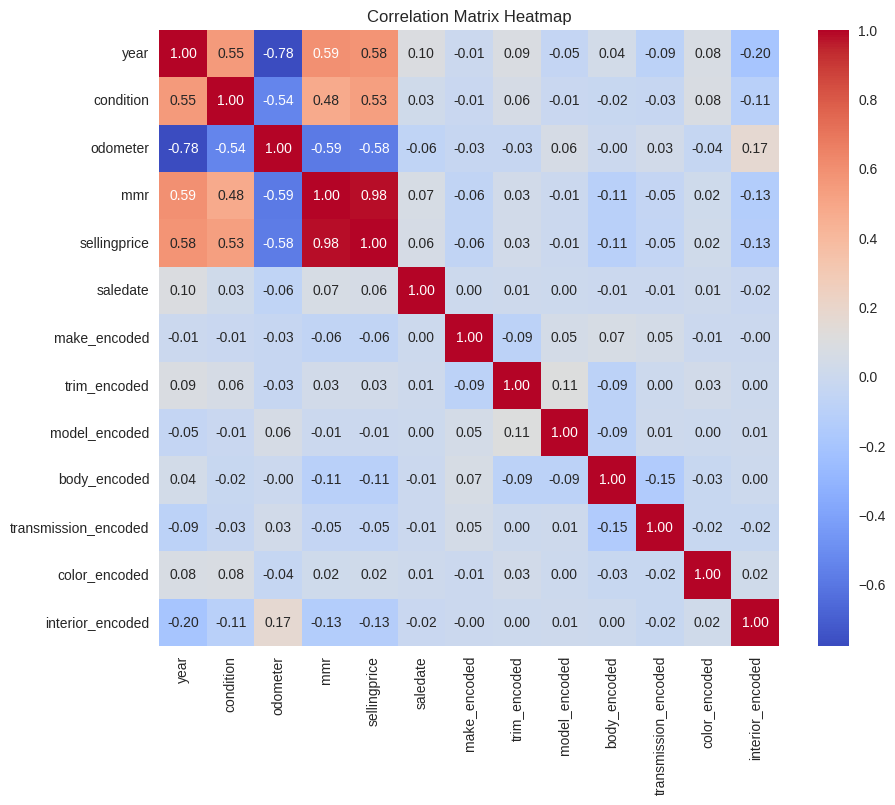

In [42]:
import matplotlib.pylab as plt
import seaborn as sns
df_copy['saledate'] = df['saledate'].apply(lambda x: x.timestamp())
corr_matrix = df_copy.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()



In [43]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,NaN,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-03 23:10:00+00:00
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [44]:
df_copy.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,mmr,sellingprice,saledate,make_encoded,trim_encoded,model_encoded,body_encoded,transmission_encoded,color_encoded,interior_encoded
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,...,11000,10900,1.433187e+09,18,494,532,6,0,1,6
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,...,28700,29900,1.424215e+09,44,847,17,5,0,7,16
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,...,22200,24200,1.421689e+09,25,278,287,6,0,15,1
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,...,3675,3200,1.425424e+09,3,209,607,5,0,1,1
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714,...,22500,22100,1.424213e+09,13,382,161,3,0,17,6


Rename columns

In [45]:
column_mapping = {
    'mmr': 'mmr in $',
    'sellingprice': 'sellingprice in $',
    'odometer':'odometer in miles'
}

df_copy = df_copy.rename(columns=column_mapping)

In [46]:
df_copy.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer in miles,...,mmr in $,sellingprice in $,saledate,make_encoded,trim_encoded,model_encoded,body_encoded,transmission_encoded,color_encoded,interior_encoded
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,...,11000,10900,1.433187e+09,18,494,532,6,0,1,6
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,...,28700,29900,1.424215e+09,44,847,17,5,0,7,16
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,...,22200,24200,1.421689e+09,25,278,287,6,0,15,1
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,...,3675,3200,1.425424e+09,3,209,607,5,0,1,1
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714,...,22500,22100,1.424213e+09,13,382,161,3,0,17,6


These columns have weak correlation with selling price, dropping independent variables that are having weak correlation with the selling price

In [47]:
#df_copy = df_copy.drop(columns=['model','model_encoded','trim','trim_encoded','transmission','transmission_encoded'])


In [48]:
#df_copy.head()


dropping independent variables that are highly correlated, year and odometer were highly correlated because the earlier the year of the car, the higher its odometer miles, that is why we will drop year


In [49]:
#df_copy = df_copy.drop(columns=['year'])

to avoid overfitting MMR and selling price are very highly correlated so we will drop MMR

In [50]:
#df_copy = df_copy.drop(columns=['mmr'])

In color and interior columns, there were special characters in multiple rows which we previously replaced to null values

Handling missing values in color and interior columns

In [51]:
unique_values = df_copy['color'].unique()
print(f"Number of unique values in 'color': {len(unique_values)}")
print("Unique values in 'color':")
print(unique_values)



Number of unique values in 'color': 20
Unique values in 'color':
['black' 'gray' 'silver' 'white' 'blue' 'burgundy' 'beige' 'gold' 'green'
 'red' 'purple' nan 'yellow' 'brown' 'turquoise' 'orange' 'off-white'
 'charcoal' 'pink' 'lime']


In [52]:
# Display the updated unique values and their counts
unique_counts = df_copy['color'].value_counts(dropna=False)
for value, count in unique_counts.items():
    print(f'{value}: {count}')



black: 9156
white: 8693
gray: 7046
silver: 6982
blue: 4244
red: 3685
nan: 2246
gold: 948
green: 891
burgundy: 785
beige: 744
brown: 529
orange: 195
purple: 137
off-white: 129
yellow: 99
charcoal: 49
turquoise: 15
pink: 3
lime: 2


Counting missing values

In [53]:
missing_values = df_copy['color'].isnull().sum()
print(f"Number of missing values in 'color': {missing_values}")

Number of missing values in 'color': 2246


We can handle missing values using different approaches:

1.   using mode
2.   replace with 'unknown'

In color column since null values represent around 5% of the total rows, and the difference between black cnd white counts are not that big, So using mode wouldn't be our best options since firstly it would shandow the analysis by assuming that around 5% of the data is added to the value 'black' which is not the case. Also, it would make the difference between black and white also significantly greater than it is already. Consquently our best option is adding another category named 'unknown'.

Replace null values with 'unknown'

In [54]:
df_copy['color'].fillna('unknown', inplace=True)

In [55]:
# Display the updated unique values and their counts
unique_counts = df_copy['color'].value_counts(dropna=False)
for value, count in unique_counts.items():
    print(f'{value}: {count}')

black: 9156
white: 8693
gray: 7046
silver: 6982
blue: 4244
red: 3685
unknown: 2246
gold: 948
green: 891
burgundy: 785
beige: 744
brown: 529
orange: 195
purple: 137
off-white: 129
yellow: 99
charcoal: 49
turquoise: 15
pink: 3
lime: 2


In [56]:
missing_values = df_copy['color'].isnull().sum()
print(f"Number of missing values in 'color': {missing_values}")

Number of missing values in 'color': 0


Interior column

In [57]:
unique_values = df_copy['interior'].unique()
print(f"Number of unique values in 'color': {len(unique_values)}")
print("Unique values in 'color':")
print(unique_values)

Number of unique values in 'color': 17
Unique values in 'color':
['gray' nan 'black' 'beige' 'tan' 'red' 'blue' 'brown' 'off-white'
 'silver' 'orange' 'purple' 'white' 'gold' 'burgundy' 'green' 'yellow']


In [58]:
# Display the updated unique values and their counts
unique_counts = df_copy['interior'].value_counts(dropna=False)
for value, count in unique_counts.items():
    print(f'{value}: {count}')

black: 20734
gray: 15020
beige: 4917
tan: 3777
nan: 988
brown: 694
blue: 101
red: 92
silver: 88
off-white: 39
purple: 31
gold: 26
white: 23
burgundy: 20
green: 16
orange: 11
yellow: 1


Counting missing values

In [59]:
missing_values = df_copy['interior'].isnull().sum()
print(f"Number of missing values in 'color': {missing_values}")

Number of missing values in 'color': 988


Since 988 is considered around 2% of the whole data and the difference between black and gray is large enough, we can use mode in handling missing (null) values

In [60]:
mode_color = df_copy['interior'].mode().iloc[0]

print(mode_color)

black


In [61]:
df_copy['interior'].fillna(mode_color, inplace=True)

In [62]:
# Display the updated unique values and their counts
unique_counts = df_copy['interior'].value_counts(dropna=False)
for value, count in unique_counts.items():
    print(f'{value}: {count}')

black: 21722
gray: 15020
beige: 4917
tan: 3777
brown: 694
blue: 101
red: 92
silver: 88
off-white: 39
purple: 31
gold: 26
white: 23
burgundy: 20
green: 16
orange: 11
yellow: 1


In [63]:
missing_values = df_copy['interior'].isnull().sum()
print(f"Number of missing values in 'color': {missing_values}")

Number of missing values in 'color': 0


Checking 'make' column

In [64]:
# Assuming 'column_name' is the name of the column you want to analyze
unique_counts = df_copy['make'].value_counts()

# Display all unique values and their counts
for value, count in unique_counts.items():
    print(f'{value}: {count}')

Ford: 7871
Chevrolet: 5322
Nissan: 4297
Toyota: 3474
Dodge: 2718
Honda: 2403
Hyundai: 1801
BMW: 1680
Kia: 1639
Chrysler: 1566
Infiniti: 1442
Mercedes-Benz: 1375
Jeep: 1305
Volkswagen: 1038
Lexus: 1024
GMC: 901
Mazda: 701
Cadillac: 606
Audi: 485
Acura: 476
Buick: 467
Lincoln: 457
Subaru: 444
Ram: 397
Pontiac: 377
Mitsubishi: 370
MINI: 289
Saturn: 286
Volvo: 281
Scion: 159
Mercury: 148
Land Rover: 143
Porsche: 129
Jaguar: 122
Suzuki: 96
HUMMER: 84
FIAT: 56
Saab: 41
smart: 36
Oldsmobile: 24
Isuzu: 19
Maserati: 10
Bentley: 8
Fisker: 3
Plymouth: 3
Geo: 2
Aston Martin: 2
Ferrari: 1


Change format (capitalized categories)

In [65]:
# Assuming 'df' is your DataFrame and 'body' is the column containing the words

# Convert 'body' column to lowercase
df_copy['make'] = df_copy['make'].str.lower()

# Display the updated unique values and their counts
unique_counts = df_copy['make'].value_counts()
for value, count in unique_counts.items():
    print(f'{value.capitalize()}: {count}')

Ford: 7871
Chevrolet: 5322
Nissan: 4297
Toyota: 3474
Dodge: 2718
Honda: 2403
Hyundai: 1801
Bmw: 1680
Kia: 1639
Chrysler: 1566
Infiniti: 1442
Mercedes-benz: 1375
Jeep: 1305
Volkswagen: 1038
Lexus: 1024
Gmc: 901
Mazda: 701
Cadillac: 606
Audi: 485
Acura: 476
Buick: 467
Lincoln: 457
Subaru: 444
Ram: 397
Pontiac: 377
Mitsubishi: 370
Mini: 289
Saturn: 286
Volvo: 281
Scion: 159
Mercury: 148
Land rover: 143
Porsche: 129
Jaguar: 122
Suzuki: 96
Hummer: 84
Fiat: 56
Saab: 41
Smart: 36
Oldsmobile: 24
Isuzu: 19
Maserati: 10
Bentley: 8
Fisker: 3
Plymouth: 3
Geo: 2
Aston martin: 2
Ferrari: 1


In [83]:
# Assuming 'df' is your DataFrame and 'body' is the column containing the words

# Convert 'body' column to lowercase
df_copy['body'] = df_copy['body'].str.lower()

# Display the updated unique values and their counts
unique_counts = df_copy['body'].value_counts()
for value, count in unique_counts.items():
    print(f'{value.capitalize()}: {count}')

Sedan: 21574
Suv: 11936
Pickup truck: 3977
Minivan: 2632
Hatchback: 2270
Coupe: 1787
Wagon: 1438
Convertible: 964


Drop vin column since it's and ID and has no menaningful effect, also it is unique to every row so it'll make too much noise

In [66]:

df_copy = df_copy.drop('vin', axis=1)

df_copy.head()

,year,make,model,trim,body,transmission,state,condition,odometer in miles,color,...,mmr in $,sellingprice in $,saledate,make_encoded,trim_encoded,model_encoded,body_encoded,transmission_encoded,color_encoded,interior_encoded
0,2013,hyundai,Sonata,GLS,Sedan,automatic,ma,3.9,50404,black,...,11000,10900,1.433187e+09,18,494,532,6,0,1,6
1,2014,toyota,4Runner,SR5,SUV,automatic,fl,4.9,17846,gray,...,28700,29900,1.424215e+09,44,847,17,5,0,7,16
2,2012,lexus,IS 250,Base,Sedan,automatic,fl,4.1,21122,silver,...,22200,24200,1.421689e+09,25,278,287,6,0,15,1
3,2002,bmw,X5,4.4i,SUV,automatic,fl,1.9,145303,black,...,3675,3200,1.425424e+09,3,209,607,5,0,1,1
4,2014,ford,E-Series Van,E-250,Minivan,automatic,wa,4.9,6714,white,...,22500,22100,1.424213e+09,13,382,161,3,0,17,6


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

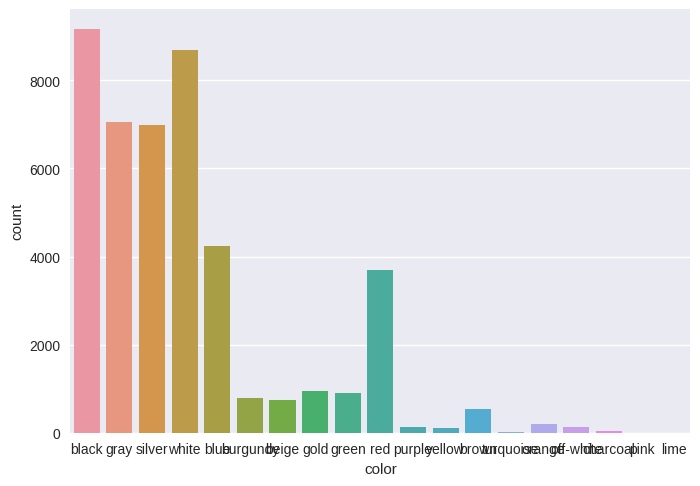

In [67]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

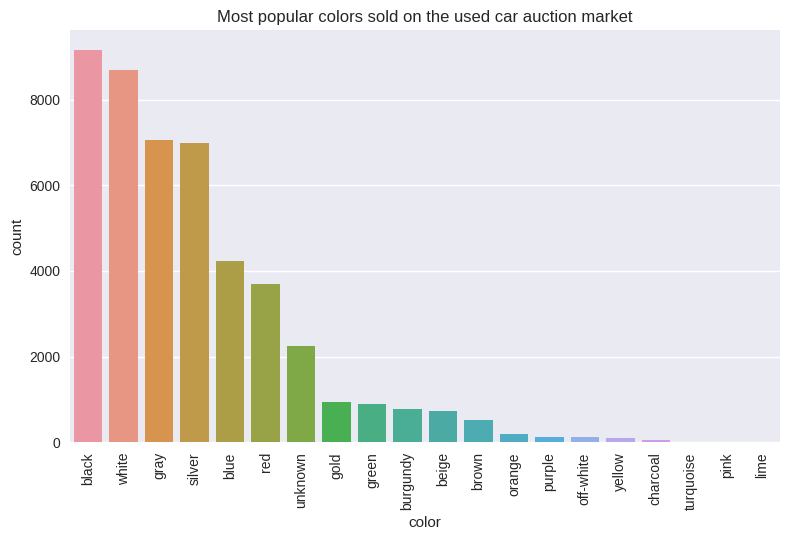

In [68]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df_copy.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df_copy, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

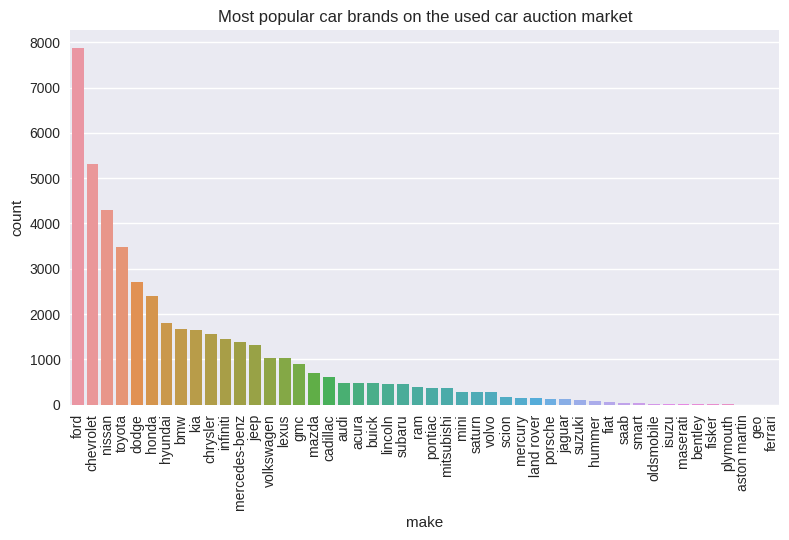

In [69]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df_copy.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df_copy, order=large_to_small.index).set(title='Most popular car brands on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: Ford is the most popular car, followed by Chevrolet then nissan then toyota

**Q2: Draw a bar plot showing the selling price of each of the transmission categories. Do automatic cars, on
average (mean), sell for a higher price than manual cars?**

(Use the following link for reference:
https://seaborn.pydata.org/generated/seaborn.barplot.html)


**Visualization**

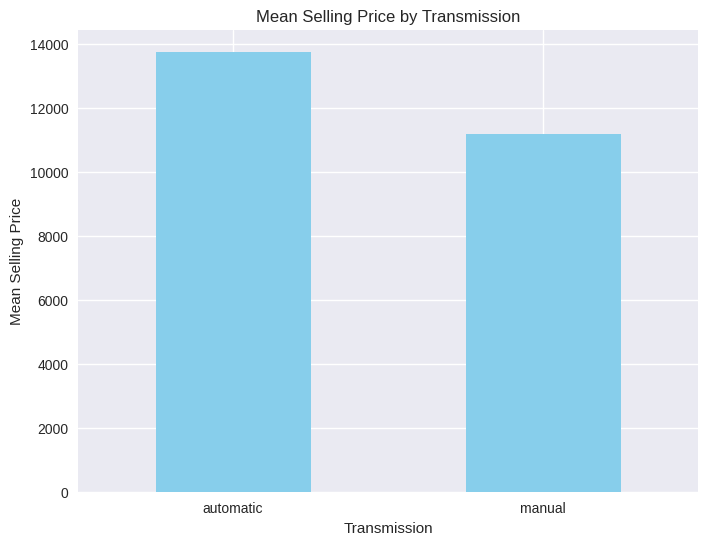

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'transmission' and 'selling_price'

# Group the data by 'transmission' and calculate the mean selling price for each category
mean_prices = df_copy.groupby('transmission')['sellingprice in $'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
mean_prices.plot(kind='bar', color='skyblue')
plt.title('Mean Selling Price by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Mean Selling Price')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


**Answer for Q2**: Yes, automatic cars, on
average (mean), sell for a higher price than manual cars

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

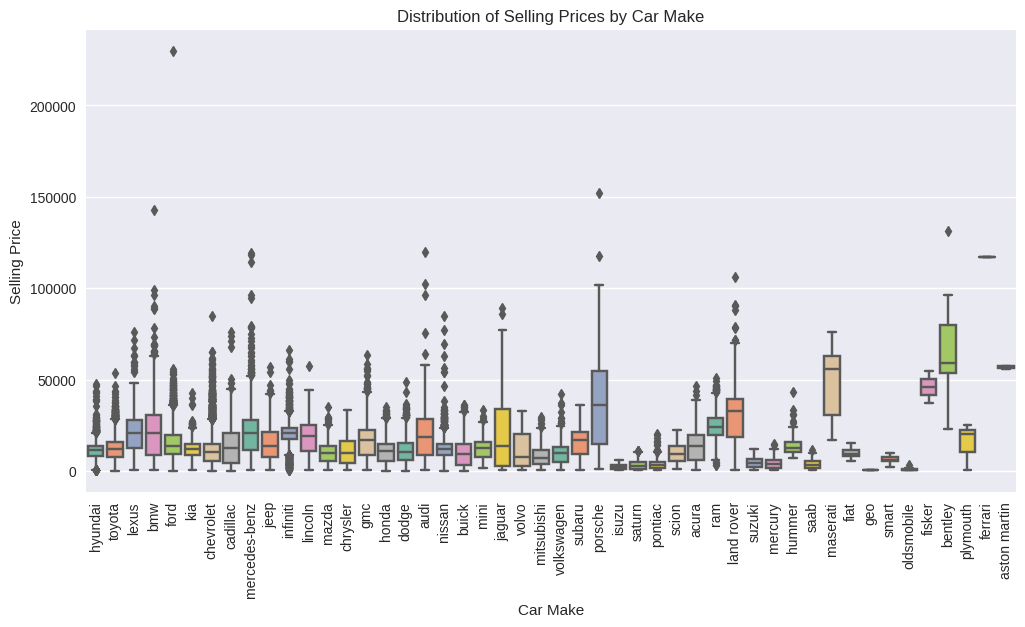

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'car_make' and 'selling_price'

# Create a box plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.boxplot(x='make', y='sellingprice in $', data=df_copy, palette='Set2')
plt.title('Distribution of Selling Prices by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.show()


**Answer for Q3**: Your answer here

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

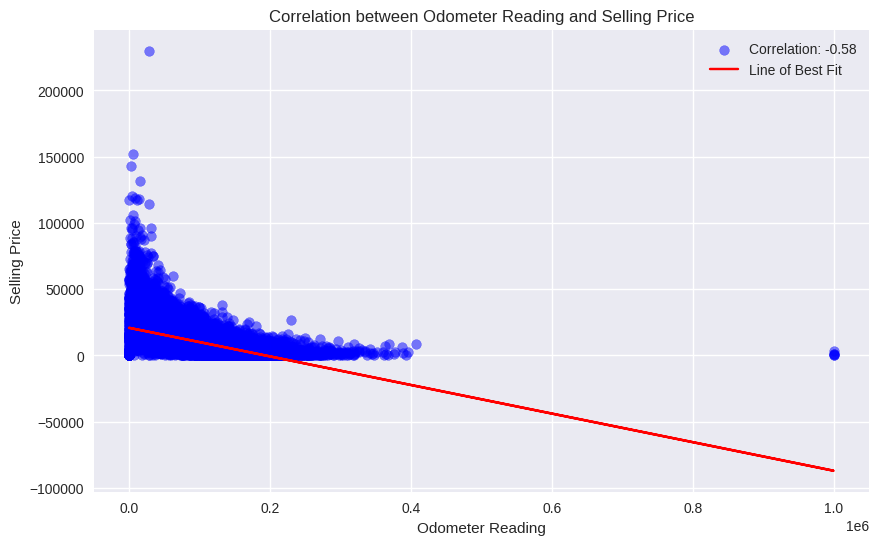

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame 'df' with columns 'odometer' and 'selling_price'

# Extract the 'odometer' and 'selling_price' columns
odometer = df_copy['odometer in miles']
selling_price = df_copy['sellingprice in $']

# Calculate the correlation coefficient between the two variables
correlation = odometer.corr(selling_price)

# Create a scatter plot with a line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(odometer, selling_price, alpha=0.5, color='b', label=f'Correlation: {correlation:.2f}')
m, b = np.polyfit(odometer, selling_price, 1)
plt.plot(odometer, m * odometer + b, color='r', label=f'Line of Best Fit')
plt.title('Correlation between Odometer Reading and Selling Price')
plt.xlabel('Odometer Reading')
plt.ylabel('Selling Price')
plt.legend()
plt.grid(True)
plt.show()


**Answer for Q4**: They have negative correlation relationship. which means they are inversely proportional, when odometer increases selling price decreases.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

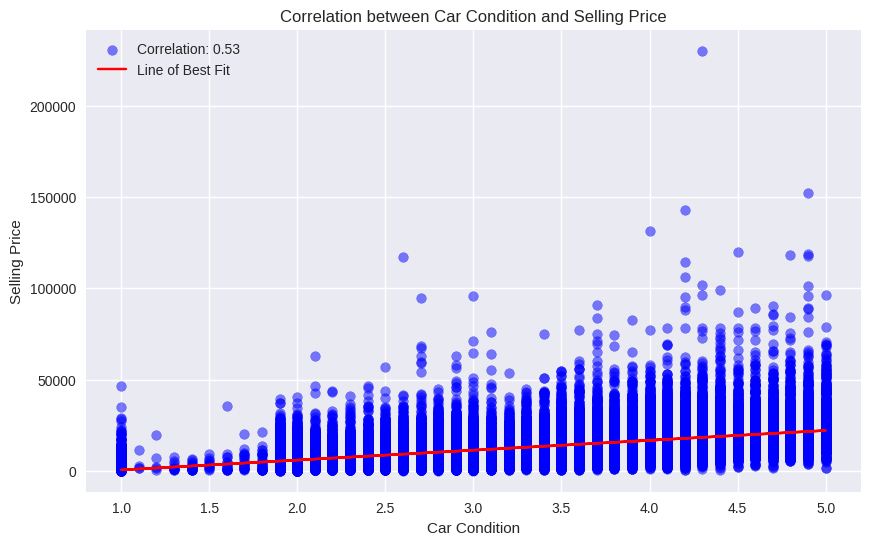

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame 'df_copy' with columns 'car_condition' and 'sellingprice in $'

# Extract the 'car_condition' and 'selling_price' columns
car_condition = df_copy['condition']
selling_price = df_copy['sellingprice in $']

# Calculate the correlation coefficient between the two variables
correlation = car_condition.corr(selling_price)

# Create a scatter plot with a line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(car_condition, selling_price, alpha=0.5, color='b', label=f'Correlation: {correlation:.2f}')
m, b = np.polyfit(car_condition, selling_price, 1)
plt.plot(car_condition, m * car_condition + b, color='r', label=f'Line of Best Fit')
plt.title('Correlation between Car Condition and Selling Price')
plt.xlabel('Car Condition')
plt.ylabel('Selling Price')
plt.legend()
plt.grid(True)
plt.show()


**Answer for Q5**: They have a positive correlation relationship, which means when car condition increases, selling price increases

**Q6: Draw a bar plot showing the selling price of each of the body categories. Are there differences in the average
(mean of) car price due to the car’s body type? If so, rank their order and state the most expensive and least
expensive car body type.**

**Visualization**

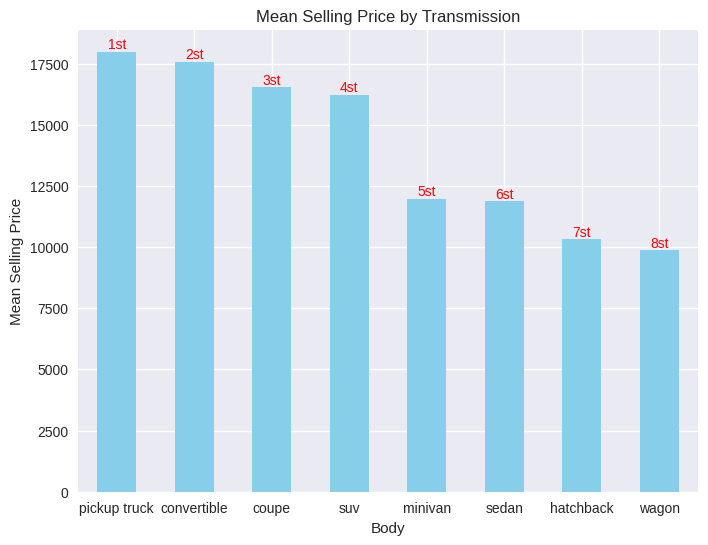

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_copy' with columns 'body' and 'sellingprice in $'

# Group the data by 'body' and calculate the mean selling price for each category
mean_prices = df_copy.groupby('body')['sellingprice in $'].mean()

# Sort the mean prices in descending order
mean_prices = mean_prices.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(8, 6))
mean_prices.plot(kind='bar', color='skyblue')
plt.title('Mean Selling Price by Transmission')
plt.xlabel('Body')
plt.ylabel('Mean Selling Price')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add ranks as 1st, 2nd, 3rd, etc.
for i, price in enumerate(mean_prices, 1):
    plt.text(i - 1, price, f'{i}st', ha='center', va='bottom', fontsize=10, color='red')

plt.show()



**Answer for Q6**:


1.   Pickup Truck
2.   Convertible
3.   Coupe
4.   SUV
5.   Minivan
6.   Sedan
7.   Hatchback
8.   Wagon

The most expensive car is Pickup Truck.
The least expensive is Wagon.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

## Modelling

_Apply the linear regression model below._

## Model Evaluation

_Evaluate the model you applied._

## Conclusion and Recommendations

Comment on the model accuracy, and thoroughly explain its value, as well as your findings from the model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.